In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

(60000, 28, 28)


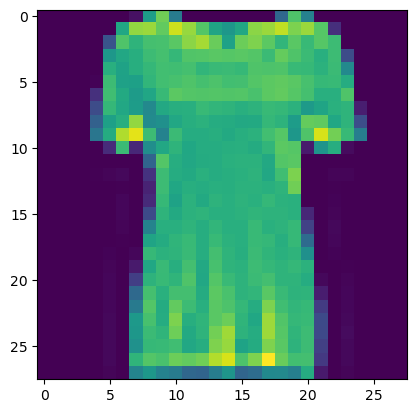

In [17]:
print(train_img.shape)
plt.imshow(train_img[10])

In [18]:
# Conversion de datos
train_img = train_img.astype("float32")/255 # Los pixeles van de 0-255 | se transforma de 0 a 1 
test_img = test_img.astype("float32")/255 # Los pixeles van de 0-255 | se transforma de 0 a 1 
print(train_img.shape, test_img.shape)

(60000, 28, 28) (10000, 28, 28)


In [22]:
# Cambio de forma
train_img = train_img.reshape(train_img.shape[0],28,28,1) # 1 canal, escala de grises, 3 escala color
test_img = test_img.reshape(test_img.shape[0],28,28,1) # 1 canal, escala de grises, 3 escala color
print(train_img.shape, test_img.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [23]:
print("before cat:\n",train_labels[0:4])
# Para estandarizar los datos con respecto a las dimensiones
train_labels = tf.keras.utils.to_categorical(train_labels, 10) # Los lleva a 0's y 1's
print("after cat:\n",train_labels[0:4])

test_labels = tf.keras.utils.to_categorical(test_labels, 10)

before cat:
 [9 0 0 3]
after cat:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [7]:
# Modelo de datos
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

# Prediccion

In [10]:
## Compilar y entrenar
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# model.fit(train_img, train_labels, batch_size=64, epochs=10)

In [ ]:
model.evaluate(test_img, test_labels, verbose=0)

# Callbacks: early stopping y checkpoints
`callback →` Si no mejora el accuracy en una determinada epoca lo detiene <br>
`checkpoint →` Si no mejora el accuracy en la epoca siguiente, no guarda el resultado y se mantiene con los pesos que mejor rindieron y lo guarda en un archivo .hdf5

## Callback

In [11]:
early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=1) # Si la epoca no mejora que acabe el entrenamiento, se ubica en el .fit
model.fit(train_img, train_labels, batch_size=64, epochs=10,
          callbacks=[early]
          )

Epoch 1/10
938/938 [==============================] - 131s 136ms/step - loss: 0.5904 - accuracy: 0.7856
Epoch 2/10
938/938 [==============================] - 124s 133ms/step - loss: 0.4027 - accuracy: 0.8562
Epoch 3/10
938/938 [==============================] - 129s 138ms/step - loss: 0.3590 - accuracy: 0.8715
Epoch 4/10
938/938 [==============================] - 112s 119ms/step - loss: 0.3381 - accuracy: 0.8790
Epoch 5/10
938/938 [==============================] - 106s 113ms/step - loss: 0.3253 - accuracy: 0.8839
Epoch 6/10
938/938 [==============================] - 106s 113ms/step - loss: 0.3194 - accuracy: 0.8871
Epoch 7/10
938/938 [==============================] - 101s 108ms/step - loss: 0.3181 - accuracy: 0.8887
Epoch 8/10
938/938 [==============================] - 101s 108ms/step - loss: 0.3149 - accuracy: 0.8891
Epoch 9/10
938/938 [==============================] - 102s 109ms/step - loss: 0.3164 - accuracy: 0.8888


In [24]:
model.evaluate(test_img, test_labels, verbose=0)
# test_labels.shape

[0.29483768343925476, 0.9031999707221985]

## Checkpoint

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="01_red_convolucional.hdf5", 
                                   verbose=1,
                                   monitor='accuracy',
                                   save_best_only=True)
model.fit(train_img, train_labels, batch_size=64, epochs=10,
          callbacks=[checkpoint]
          )

model2 = model
model2.load_weights('./01_red_convolucional.hdf5')
model2.evaluate(test_img, test_labels)

Epoch 1/10
938/938 [==============================] - ETA: 0s - loss: 0.3151 - accuracy: 0.8896
Epoch 1: accuracy improved from -inf to 0.88960, saving model to 01_red_convolucional.hdf5
938/938 [==============================] - 119s 126ms/step - loss: 0.3151 - accuracy: 0.8896
Epoch 2/10
938/938 [==============================] - ETA: 0s - loss: 0.3163 - accuracy: 0.8914
Epoch 2: accuracy improved from 0.88960 to 0.89140, saving model to 01_red_convolucional.hdf5
938/938 [==============================] - 109s 116ms/step - loss: 0.3163 - accuracy: 0.8914
Epoch 3/10
938/938 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.8891
Epoch 3: accuracy did not improve from 0.89140
938/938 [==============================] - 111s 118ms/step - loss: 0.3219 - accuracy: 0.8891
Epoch 4/10
938/938 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8892
Epoch 4: accuracy did not improve from 0.89140
938/938 [==============================] - 99s 105ms/step 

[0.30935269594192505, 0.9025999903678894]

In [27]:
model2.evaluate(test_img, test_labels, verbose=0)

[0.30935269594192505, 0.9025999903678894]